In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import mysql.connector
import getpass 
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_columns', None)

In [ ]:
# for reference, will try to run both models due to the limited capacity from my computer.

#69000 rows
# light_version_per_product4
#r"C:\Users\mfduh\OneDrive\Documents\Deutschland\Arbeiten\Data Analyst\Jupyter excercises\Week 9 - Final Project\Created_queries\light_version_per_product4.csv"

#39000 rows
# forty_thou
#r"C:\Users\mfduh\OneDrive\Documents\Deutschland\Arbeiten\Data Analyst\Jupyter excercises\Week 9 - Final Project\Created_queries\forty_thou.csv"


In [3]:
data = pd.read_csv(r"C:\Users\mfduh\OneDrive\Documents\Deutschland\Arbeiten\Data Analyst\Jupyter excercises\Week 9 - Final Project\Created_queries\light_version_per_product4.csv",
                  dtype = {'year':str,'month':str,'product':str,'sales_person':str,'supplier':str})
data

,store,year,month,c_line,section,model,group,subgroup,product,sales_person,list,supplier,units,discount,cost,price,profit
0,T012,2021.0,4.0,BEBE,UNISEX,TELA,ALMOHADA,LINEA,3.0,406.0,AGUASCALIENTES,0008,1.0,0.00,215.07465,384.52,169.44535
1,T013,2021.0,4.0,BEBE,UNISEX,TELA,ALMOHADA,LINEA,3.0,463.0,AGUASCALIENTES,0008,1.0,0.00,436.98273,791.50,354.51727
2,T003,2021.0,4.0,BEBE,UNISEX,VELOUR,ALMOHADA,LINEA,5.0,461.0,AGUASCALIENTES,0129,1.0,0.00,292.24129,487.92,195.67871
3,T005,2021.0,4.0,BEBE,UNISEX,VELOUR,ALMOHADA,LINEA,5.0,466.0,AGUASCALIENTES,0129,1.0,0.00,95.68965,150.00,54.31035
4,T007,2021.0,4.0,BEBE,UNISEX,VELOUR,ALMOHADA,LINEA,5.0,417.0,AGUASCALIENTES,0129,1.0,0.00,100.86199,187.92,87.05801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59450,T020,2022.0,9.0,UNISEX,INVIERNO,ALGODÓN,PLAYERA,LINEA,4274.0,478.0,AGUASCALIENTES,0179,2.0,0.00,28.95720,60.34,31.38280
59451,T007,2022.0,9.0,DAMA,SIN GENERO,ALGODÓN,BLUSA,LINEA,4280.0,613.0,AGUASCALIENTES,0191,1.0,0.00,30.17240,51.72,21.54760
59452,T011,2022.0,9.0,NIÑA,FEMENINO,ALGODÓN/POLIESTER,MALLA,LEGGING,4290.0,116.0,AGUASCALIENTES,0126,2.0,32.76,73.65160,86.21,12.55840
59453,T013,2022.0,9.0,NIÑA,FEMENINO,ALGODÓN/POLIESTER,MALLA,LEGGING,4290.0,565.0,AGUASCALIENTES,0126,2.0,32.76,75.02280,86.21,11.18720


In [4]:
data.dtypes

store            object
year             object
month            object
c_line           object
section          object
model            object
group            object
subgroup         object
product          object
sales_person     object
list             object
supplier         object
units           float64
discount        float64
cost            float64
price           float64
profit          float64
dtype: object

In [5]:
# Check columns to drop unnecesary before modeling 

# data['clase'].value_counts()              # drop 
# data['almacen'].value_counts()
# data['tipo_pago'].value_counts()
# data['seccion'].value_counts()
# data['talla'].value_counts()
# data['modelo'].value_counts()
# data['color'].value_counts()
# data['descripcion'].value_counts()         # drop
# data['grupo'].value_counts()
# data['subgrupo'].value_counts()
# data['linea'].value_counts()
# data['marca'].value_counts()               # drop for model2
data['list'].value_counts()
# data['proveedor'].value_counts()           # drop for model2
# data['detalle'].value_counts()             # drop for model2


# data['cantidad'].value_counts()
# data['descuento'].value_counts()           # drop for model2
# data['subtotal'].value_counts()            #target
# data['iva'].value_counts()                 #drop
# data['total'].value_counts()               #drop
# data['costo'].value_counts()               #check if drop
# data['costo_ind'].value_counts()           #check if drop


AGUASCALIENTES    59455
Name: list, dtype: int64

In [6]:
# Last changes before modeling:
# data.list = data.list.replace('MINIMO','DISTRIBUIDOR')     # old change
data = data.drop(columns=['list'], axis=1)

In [7]:
data

,store,year,month,c_line,section,model,group,subgroup,product,sales_person,supplier,units,discount,cost,price,profit
0,T012,2021.0,4.0,BEBE,UNISEX,TELA,ALMOHADA,LINEA,3.0,406.0,0008,1.0,0.00,215.07465,384.52,169.44535
1,T013,2021.0,4.0,BEBE,UNISEX,TELA,ALMOHADA,LINEA,3.0,463.0,0008,1.0,0.00,436.98273,791.50,354.51727
2,T003,2021.0,4.0,BEBE,UNISEX,VELOUR,ALMOHADA,LINEA,5.0,461.0,0129,1.0,0.00,292.24129,487.92,195.67871
3,T005,2021.0,4.0,BEBE,UNISEX,VELOUR,ALMOHADA,LINEA,5.0,466.0,0129,1.0,0.00,95.68965,150.00,54.31035
4,T007,2021.0,4.0,BEBE,UNISEX,VELOUR,ALMOHADA,LINEA,5.0,417.0,0129,1.0,0.00,100.86199,187.92,87.05801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59450,T020,2022.0,9.0,UNISEX,INVIERNO,ALGODÓN,PLAYERA,LINEA,4274.0,478.0,0179,2.0,0.00,28.95720,60.34,31.38280
59451,T007,2022.0,9.0,DAMA,SIN GENERO,ALGODÓN,BLUSA,LINEA,4280.0,613.0,0191,1.0,0.00,30.17240,51.72,21.54760
59452,T011,2022.0,9.0,NIÑA,FEMENINO,ALGODÓN/POLIESTER,MALLA,LEGGING,4290.0,116.0,0126,2.0,32.76,73.65160,86.21,12.55840
59453,T013,2022.0,9.0,NIÑA,FEMENINO,ALGODÓN/POLIESTER,MALLA,LEGGING,4290.0,565.0,0126,2.0,32.76,75.02280,86.21,11.18720


In [8]:
model1 = data.copy()

<AxesSubplot:>

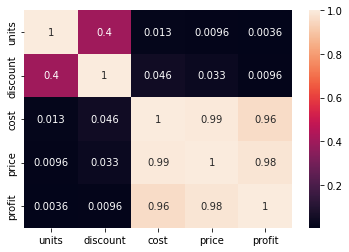

In [9]:
sns.heatmap(model1.corr(), annot=True)

<AxesSubplot:>

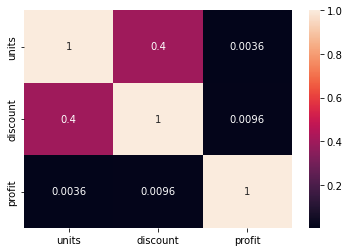

In [10]:
# drop cost & price due to high correlation
model1 = model1.drop(columns=['cost'], axis=1)
model1 = model1.drop(columns=['price'], axis=1)
sns.heatmap(model1.corr(), annot=True)

#### Divide X & y

In [11]:
X = model1.drop(columns=['profit']).copy()

In [12]:
X.head(2)

,store,year,month,c_line,section,model,group,subgroup,product,sales_person,supplier,units,discount
0,T012,2021.0,4.0,BEBE,UNISEX,TELA,ALMOHADA,LINEA,3.0,406.0,0008,1.0,0.0
1,T013,2021.0,4.0,BEBE,UNISEX,TELA,ALMOHADA,LINEA,3.0,463.0,0008,1.0,0.0


In [13]:
y = model1['profit'].copy()

In [14]:
y = pd.DataFrame(y, columns = ['profit'])

In [15]:
y.head(2)

,profit
0,169.44535
1,354.51727


#### Split train-test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X_num_train = X_train.select_dtypes(np.number)
X_cat_train = X_train.select_dtypes(object)

X_num_test = X_test.select_dtypes(np.number)
X_cat_test = X_test.select_dtypes(object)

#### Check sets

In [18]:
X_num_train.head(2)

,units,discount
20156,1.0,0.0
29270,1.0,0.0


In [19]:
X_cat_train.head(2)

,store,year,month,c_line,section,model,group,subgroup,product,sales_person,supplier
20156,T013,2021.0,3.0,BEBE,SIN GENERO,TOALLA,TOALLA,LINEA,4193.0,373.0,Other
29270,T011,2021.0,9.0,NIÑA,FEMENINO,TELA,VESTIDO,LINEA,2026.0,116.0,0022


#### Transform, fit, normalize

In [20]:
transformer = MinMaxScaler().fit(X_num_train)
x_normalized = transformer.transform(X_num_train)
data_normalized = pd.DataFrame(x_normalized, columns = X_num_train.columns)

In [21]:
data_normalized.head(5)

,units,discount
0,0.000000,0.116883
1,0.000000,0.116883
2,0.000000,0.116883
3,0.000000,0.116883
4,0.005917,0.116883


In [22]:
encoder = OneHotEncoder(drop='first').fit(X_cat_train)
encoded = encoder.transform(X_cat_train).toarray()

cols = encoder.get_feature_names_out(input_features=X_cat_train.columns)
onehot_encoded = pd.DataFrame(encoded, columns=cols)

In [23]:
onehot_encoded.head(2)

store_T002  store_T003  store_T004  store_T005  store_T006  store_T007  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   

   store_T008  store_T009  store_T010  store_T011  store_T012  store_T013  \
0         0.0         0.0         0.0         0.0         0.0         1.0   
1         0.0         0.0         0.0         1.0         0.0         0.0   

   store_T014  store_T015  store_T016  store_T017  store_T018  store_T019  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   

   store_T020  store_T021  store_T022  year_2022.0  month_10.0  month_11.0  \
0         0.0         0.0         0.0          0.0         0.0         0.0   
1         0.0         0.0         0.0          0.0         0.0         0.0   

   month_12.0  month_2.0  month_3.0  month_4.0  month_5.0  month_6.0  \
0         0.0        0.0        1.0        0.0        0.0        0.0   
1         0.0        0.0        0.0        0.0        0.0        0.0   

   month_7.0  month_8.0  month_9.0  c_line_BEBE  c_line_BEBE FEMENINO  \
0        0.0        0.0        0.0          1.0                   0.0   
1        0.0        0.0        1.0          0.0                   0.0   

   c_line_BEBE MASCULINO  c_line_BLANCOS  c_line_CABALLERO  c_line_DAMA  \
0                    0.0             0.0               0.0          0.0   
1                    0.0             0.0               0.0          0.0   

   c_line_DEFAULT  c_line_JUVENIL  c_line_NIÑA  c_line_NIÑO  c_line_UNISEX  \
0             0.0             0.0          0.0          0.0            0.0   
1             0.0             0.0          1.0          0.0            0.0   

   section_FEMENINO  section_INTERIOR  section_INVIERNO  section_MASCULINO  \
0               0.0               0.0               0.0                0.0   
1               1.0               0.0               0.0                0.0   

   section_OFERTA  section_SIN GENERO  section_UNISEX  section_VERANO  \
0             0.0                 1.0             0.0             0.0   
1             0.0                 0.0             0.0             0.0   

   model_ACRILAN  model_ALGODÓN  model_ALGODÓN/ELASTICO  \
0            0.0            0.0                     0.0   
1            0.0            0.0                     0.0   

   model_ALGODÓN/GABARDINA  model_ALGODÓN/LIKRA  model_ALGODÓN/MEZCLILLA  \
0                      0.0                  0.0                      0.0   
1                      0.0                  0.0                      0.0   

   model_ALGODÓN/POLIESTER  model_ALGODÓN/TUL  model_BORREGA  model_BRUSH  \
0                      0.0                0.0            0.0          0.0   
1                      0.0                0.0            0.0          0.0   

   model_CANALE  model_CAPITONADO  model_CENEFA  model_CHAROL  model_CORAL  \
0           0.0               0.0           0.0           0.0          0.0   
1           0.0               0.0           0.0           0.0          0.0   

   model_DEFAULT  model_ENCAJE  model_FELPA  model_FLANEL  model_FRANELA  \
0            0.0           0.0          0.0           0.0            0.0   
1            0.0           0.0          0.0           0.0            0.0   

   model_GABARDINA  model_GABARDINA/MEZCLILLA  model_GAMUZA  model_HACCI  \
0              0.0                        0.0           0.0          0.0   
1              0.0                        0.0           0.0          0.0   

   model_JACKAR  model_LIKRA  model_LIKRA TERMICA  model_LIKRA/ALGODÓN  \
0           0.0          0.0                  0.0                  0.0   
1           0.0          0.0                  0.0                  0.0   

   model_LISTON  model_LONETA  model_MACUCO  model_MANTA  model_MEZCLILLA  \
0           0.0           0.0           0.0          0.0              0.0   
1         

In [24]:
X_train_treated = pd.concat([onehot_encoded, data_normalized], axis=1)

In [ ]:
# from tqdm.notebook import tqdm
# for i in tqdm(range(x)):   
    

In [32]:
# !pip install progressbar

  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=45a8d2715ef6cad9b7b6f3534a7383a134ba1fcd6aca9136406d776004a0a7af
  Stored in directory: c:\users\mfduh\appdata\local\pip\cache\wheels\d7\d9\89\a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built progressbar


In [ ]:
# import progressbar
# from time import sleep
# bar = progressbar.ProgressBar(maxval=20, \
#     widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
# bar.start()
# for i in range(20):
#     bar.update(i+1)
#     sleep(0.1)
# bar.finish()

In [29]:
%%time
X_train_treated.head(2)

CPU times: total: 0 ns
Wall time: 7.94 ms


store_T002  store_T003  store_T004  store_T005  store_T006  store_T007  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   

   store_T008  store_T009  store_T010  store_T011  store_T012  store_T013  \
0         0.0         0.0         0.0         0.0         0.0         1.0   
1         0.0         0.0         0.0         1.0         0.0         0.0   

   store_T014  store_T015  store_T016  store_T017  store_T018  store_T019  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   

   store_T020  store_T021  store_T022  year_2022.0  month_10.0  month_11.0  \
0         0.0         0.0         0.0          0.0         0.0         0.0   
1         0.0         0.0         0.0          0.0         0.0         0.0   

   month_12.0  month_2.0  month_3.0  month_4.0  month_5.0  month_6.0  \
0         0.0        0.0        1.0        0.0        0.0        0.0   
1         0.0        0.0        0.0        0.0        0.0        0.0   

   month_7.0  month_8.0  month_9.0  c_line_BEBE  c_line_BEBE FEMENINO  \
0        0.0        0.0        0.0          1.0                   0.0   
1        0.0        0.0        1.0          0.0                   0.0   

   c_line_BEBE MASCULINO  c_line_BLANCOS  c_line_CABALLERO  c_line_DAMA  \
0                    0.0             0.0               0.0          0.0   
1                    0.0             0.0               0.0          0.0   

   c_line_DEFAULT  c_line_JUVENIL  c_line_NIÑA  c_line_NIÑO  c_line_UNISEX  \
0             0.0             0.0          0.0          0.0            0.0   
1             0.0             0.0          1.0          0.0            0.0   

   section_FEMENINO  section_INTERIOR  section_INVIERNO  section_MASCULINO  \
0               0.0               0.0               0.0                0.0   
1               1.0               0.0               0.0                0.0   

   section_OFERTA  section_SIN GENERO  section_UNISEX  section_VERANO  \
0             0.0                 1.0             0.0             0.0   
1             0.0                 0.0             0.0             0.0   

   model_ACRILAN  model_ALGODÓN  model_ALGODÓN/ELASTICO  \
0            0.0            0.0                     0.0   
1            0.0            0.0                     0.0   

   model_ALGODÓN/GABARDINA  model_ALGODÓN/LIKRA  model_ALGODÓN/MEZCLILLA  \
0                      0.0                  0.0                      0.0   
1                      0.0                  0.0                      0.0   

   model_ALGODÓN/POLIESTER  model_ALGODÓN/TUL  model_BORREGA  model_BRUSH  \
0                      0.0                0.0            0.0          0.0   
1                      0.0                0.0            0.0          0.0   

   model_CANALE  model_CAPITONADO  model_CENEFA  model_CHAROL  model_CORAL  \
0           0.0               0.0           0.0           0.0          0.0   
1           0.0               0.0           0.0           0.0          0.0   

   model_DEFAULT  model_ENCAJE  model_FELPA  model_FLANEL  model_FRANELA  \
0            0.0           0.0          0.0           0.0            0.0   
1            0.0           0.0          0.0           0.0            0.0   

   model_GABARDINA  model_GABARDINA/MEZCLILLA  model_GAMUZA  model_HACCI  \
0              0.0                        0.0           0.0          0.0   
1              0.0                        0.0           0.0          0.0   

   model_JACKAR  model_LIKRA  model_LIKRA TERMICA  model_LIKRA/ALGODÓN  \
0           0.0          0.0                  0.0                  0.0   
1           0.0          0.0                  0.0                  0.0   

   model_LISTON  model_LONETA  model_MACUCO  model_MANTA  model_MEZCLILLA  \
0           0.0           0.0           0.0          0.0              0.0   
1         

In [30]:
model1 = DecisionTreeRegressor(max_depth=10,
                              min_samples_leaf = 2,
                              min_samples_split = 10)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor(n_neighbors=7,n_jobs = -1)
from sklearn.preprocessing import StandardScaler
model4 = RandomForestRegressor(max_depth=10,                    # try and run it without randomforest
                              min_samples_leaf = 2,
                              min_samples_split = 10,
                              n_jobs = -1)

In [ ]:
# time required was too long for my computers capacity and decided to run only Knn & LRm
# %%time
# model_pipeline = [model1, model2, model3,model4]
# model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN', 'Random Forest Regressor']
# scores = {}
# for model, model_name in zip(model_pipeline, model_names):
#     mean_score = np.mean(cross_val_score(model, X_train_treated, y_train, cv=5))
#     scores[model_name] = mean_score
#     print('Model '+model_name+ ' done.')
# print(scores)

In [40]:
%%time
model_pipeline = [model2, model3]
model_names = ['Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_treated, y_train, cv=5))
    scores[model_name] = mean_score
    print('Model '+model_name+ ' done.')
print(scores)

# First results:
# Model Linear Regression done.
# Model KNN done.
# {'Linear Regression': -9.849309549515837e+19, 'KNN': 0.5976398511984309}
# CPU times: total: 25min 38s
# Wall time: 6min 36s

Model Linear Regression done.
Model KNN done.
{'Linear Regression': -9.849309549515837e+19, 'KNN': 0.5976398511984309}
CPU times: total: 25min 38s
Wall time: 6min 36s


In [38]:
%%time
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_treated,y_train)

from sklearn.metrics import r2_score
predictions = lm.predict(X_train_treated)
print('R2 y_train: ', r2_score(y_train, predictions)) 

# R2 y_train:  0.5201945018523035

CPU times: total: 1min 54s
Wall time: 59.1 s


LinearRegression()

R2 y_train:  0.5201945018523035


In [ ]:
# Now for the testing data # I have a mistake check the challenge_data

# NORMALIZING AND ONEHOTENCODING
numerical_test = X_test.select_dtypes(np.number)
categorical_test = X_test.select_dtypes(object)

# MINMAX
X_normalized_test = transformer.transform(numerical_test)
X_normalized_test = pd.DataFrame(X_normalized_test, columns=numerical_test.columns)

# ONEHOT
encoded = encoder.transform(categorical_test).toarray()
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out(categorical_test.columns))

# concatenating
X_ready_test = pd.concat([X_normalized_test,onehot_encoded],axis=1)

In [ ]:
predictions_test = lm.predict(X_ready_test)
print('R2 y_test: ', r2_score(y_test, predictions_test))

from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,predictions_test)
print('MSE test: ',mse)

rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print('RMSE test: ',rmse)

In [ ]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_treated, y_train)

In [ ]:
import pickle
tree = pickle.load(open("Decision Tree Regressor.sav", 'rb'))
# forest = pickle.load(open("Random Tree Regressor.sav", 'rb'))

In [ ]:
tree

In [ ]:
tree.best_score_